# MNIST Digit Recognizer using Convolutional Neural Network

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf
from keras import backend as K

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)


rn.seed(20)
np.random.seed(8)
tf.set_random_seed(1998)

Using TensorFlow backend.


In [2]:
train = pd.read_csv("../input/train.csv")
print(train.shape)
print(train.head())

(42000, 785)
   label  pixel0  pixel1    ...     pixel781  pixel782  pixel783
0      1       0       0    ...            0         0         0
1      0       0       0    ...            0         0         0
2      1       0       0    ...            0         0         0
3      4       0       0    ...            0         0         0
4      0       0       0    ...            0         0         0

[5 rows x 785 columns]


In [3]:
test = pd.read_csv("../input/test.csv")
print(test.shape)
print(test.head())

(28000, 784)
   pixel0  pixel1  pixel2    ...     pixel781  pixel782  pixel783
0       0       0       0    ...            0         0         0
1       0       0       0    ...            0         0         0
2       0       0       0    ...            0         0         0
3       0       0       0    ...            0         0         0
4       0       0       0    ...            0         0         0

[5 rows x 784 columns]


In [4]:
XTrain = train.iloc[:,1:].values.astype('float32')
yTrain = train.iloc[:,0].values.astype('int32')

XTest = test.values.astype('float32')

In [5]:
#Converting Flattened images to its 2D matrix form
XTrain = XTrain.reshape(XTrain.shape[0], 28, 28)
XTest = XTest.reshape(XTest.shape[0], 28, 28)

### Image Visualisation

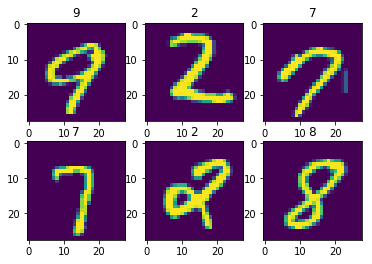

In [6]:
import matplotlib.pyplot as plt

for i in range(6):
    plt.subplot(231 + i) #2 row, 3 col -> 6 cells; place image in 1st, 2nd,..6th cell
    plt.imshow(XTrain[100+i])
    plt.title(yTrain[100+i])


In [7]:
#Expand one more dimension for Colour channel Gray
XTrain = XTrain.reshape(XTrain.shape[0], 28, 28, 1)
XTest = XTest.reshape(XTest.shape[0], 28, 28, 1)

#Normalise inputs from 0-255 to 0-1
XTrain = XTrain/255
XTest = XTest/255

([<matplotlib.axis.XTick at 0x7f01a054db00>,
 <a list of 10 Text xticklabel objects>)

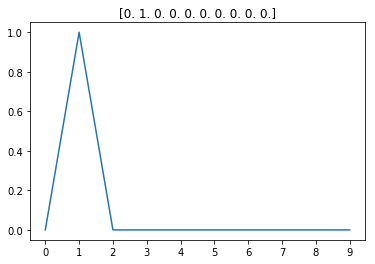

In [8]:
#OneHot Encoding of labels
from keras.utils.np_utils import to_categorical
yTrain = to_categorical(yTrain)

#Plotting one of the label
import matplotlib.pyplot as plt
plt.figure()
plt.title(yTrain[1000])
plt.plot(yTrain[1000])
plt.xticks(range(10))

## Build Convolution Neural Network

In [9]:
#import libraries
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

In [10]:
def convNeuralNetwork():
    model = Sequential([
        Convolution2D(32, input_shape=(28,28,1), kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        BatchNormalization(),
        Dropout(0.3),
        Convolution2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        BatchNormalization(),
        Dropout(0.3),
        Convolution2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        BatchNormalization(),
        Dropout(0.3),
        Flatten(),
        Dense(96, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [11]:
classifier = convNeuralNetwork()
classifier.optimizer.lr = 0.01
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 32)          128       
__________

In [12]:
#Fit Model
history = classifier.fit(XTrain, yTrain, batch_size=10, epochs=20, validation_split=0.2,  verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 33s 976us/step - loss: 0.2698 - acc: 0.9193 - val_loss: 0.0968 - val_acc: 0.9694
Epoch 2/20
33600/33600 [==============================] - 31s 918us/step - loss: 0.1735 - acc: 0.9502 - val_loss: 0.0746 - val_acc: 0.9779
Epoch 3/20
33600/33600 [==============================] - 31s 922us/step - loss: 0.1633 - acc: 0.9546 - val_loss: 0.1212 - val_acc: 0.9677
Epoch 4/20
33600/33600 [==============================] - 31s 923us/step - loss: 0.1584 - acc: 0.9599 - val_loss: 0.0812 - val_acc: 0.9782
Epoch 5/20
33600/33600 [==============================] - 31s 919us/step - loss: 0.1546 - acc: 0.9612 - val_loss: 0.0660 - val_acc: 0.9820
Epoch 6/20
33600/33600 [==============================] - 31s 917us/step - loss: 0.1460 - acc: 0.9646 - val_loss: 0.0648 - val_acc: 0.9848
Epoch 7/20
33600/33600 [==============================] - 31s 919us/step - loss: 0.1425 - acc: 0.9651 - val_loss: 0.0

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Confusion Matrix
: [[4116    0    1    0    1    0    1    0   12    1]
 [   0 4655    6    0    1    0    2   13    7    0]
 [   3    4 4144    1    0    0    1    5   16    3]
 [   2    1   10 4260    0    2    0    7   61    8]
 [   2    5    2    0 4025    0   17    4    8    9]
 [   6    1    0    6    0 3714    8    1   39   20]
 [  77    2    1    0    1    2 4033    0   21    0]
 [   0    5   24    0    3    0    0 4353    8    8]
 [   9    5    8    2    4    2    3    1 4014   15]
 [   7    0    0    0  108    1    0   17   24 4031]]
Accuracy on dataset =  0.9844047619047619


Text(0.5,0,'Epoch')

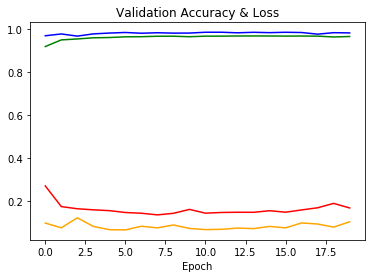

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifier.predict(XTrain)
print(yPred[0])
cm = confusion_matrix(np.argmax(yTrain,axis=1),np.argmax(yPred,axis=1))
print("Confusion Matrix\n:",cm)
accuracy = accuracy_score(np.argmax(yTrain,axis=1),np.argmax(yPred,axis=1))
print("Accuracy on dataset = ",accuracy)

from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['acc'],'green',label='Training Accuracy')
plt.plot(history.history['val_acc'],'blue',label='Validation Accuracy')
plt.plot(history.history['loss'],'red',label='Loss')
plt.plot(history.history['val_loss'],'orange',label='Validation Loss')
plt.title('Validation Accuracy & Loss')
plt.xlabel('Epoch')


## Predicting Test Set Results


In [14]:
predictions = classifier.predict_classes(XTest, verbose=1)
result = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
result.to_csv("result4.csv", index=False, header=True)

28000/28000 [==============================] - 2s 71us/step


### Save the Model

In [15]:
#Serialize model to JSON
model_json = classifier.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)

#Serialize weights to HDF5
classifier.save_weights("model4.h5")